# Immigration removals/deportations by year

Data source: [Office of Homeland Security Statistics](https://ohss.dhs.gov/topics/immigration/immigration-enforcement/immigration-enforcement-and-legal-processes-monthly#table-data-heading). table 1

---

Also see [glossary](https://ohss.dhs.gov/glossary): 

Effectively, "returns" are *voluntary* departures of non-citizens based on *administrative* criteria (expiration/denial of visa) or *enforcement* criteria (being asked to leave, for various reasons). 

"Removals" are *compulsory* returns in which the non-citizen is transferred to another country by immigration officials, a.k.a. deportation.

"Title 42 expulsions" were a pandemic measure in which migrants who crossed the US-Mexico border were immediately returned to Mexico. It began in March 2020 and ended on May 11, 2023.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import afp_style as style
plt.style.use('https://storage.googleapis.com/datanode/afpchart.mplstyle')

In [3]:
df = pd.read_csv('data/ielp-table-202408.csv')

In [4]:
df.head()

,Calendar Year,Fiscal Year,Month,Repatriations:Title 42 Expulsions,Repatriations:Administrative Returns,Repatriations:Enforcement Returns,Repatriations:Removals,Repatriations:Total,Southwest Border Book-outs/OFO:Other outcomes,Southwest Border Book-outs/OFO:OFO Paroles,...,Southwest Border Book-outs/USBP:Total,Southwest Border Book-outs/CBP:Other outcomes,Southwest Border Book-outs/CBP:OFO Paroles,Southwest Border Book-outs/CBP:USBP Releases,Southwest Border Book-outs/CBP:Transfers to HHS,Southwest Border Book-outs/CBP:Transfers to ICE,Southwest Border Book-outs/CBP:Migrant Protection Protocols,Southwest Border Book-outs/CBP:T42 expulsions,Southwest Border Book-outs/CBP:T8 repatriations,Southwest Border Book-outs/CBP:Total
0,2013,2014,0,X,45670,117890,404700,568250,130,25500,...,479370,2890,25500,6520,56760,221300,X,X,257090,570050
1,2013,2014,10,X,3510,9890,37370,50770,10,2020,...,35310,220,2020,180,2790,13900,X,X,22730,41840
2,2013,2014,11,X,2930,9140,31940,44010,10,2120,...,31900,210,2120,130,3220,13210,X,X,19800,38690
3,2013,2014,12,X,3020,8870,29350,41240,10,2140,...,29530,200,2140,200,3510,13500,X,X,17170,36710
4,2014,2014,1,X,3550,8750,30070,42370,10,1880,...,28670,200,1880,170,2700,11070,X,X,19190,35200


In [5]:
df = df.replace('X', 0)

In [6]:
df.head(1)

,Calendar Year,Fiscal Year,Month,Repatriations:Title 42 Expulsions,Repatriations:Administrative Returns,Repatriations:Enforcement Returns,Repatriations:Removals,Repatriations:Total,Southwest Border Book-outs/OFO:Other outcomes,Southwest Border Book-outs/OFO:OFO Paroles,...,Southwest Border Book-outs/USBP:Total,Southwest Border Book-outs/CBP:Other outcomes,Southwest Border Book-outs/CBP:OFO Paroles,Southwest Border Book-outs/CBP:USBP Releases,Southwest Border Book-outs/CBP:Transfers to HHS,Southwest Border Book-outs/CBP:Transfers to ICE,Southwest Border Book-outs/CBP:Migrant Protection Protocols,Southwest Border Book-outs/CBP:T42 expulsions,Southwest Border Book-outs/CBP:T8 repatriations,Southwest Border Book-outs/CBP:Total
0,2013,2014,0,0,45670,117890,404700,568250,130,25500,...,479370,2890,25500,6520,56760,221300,0,0,257090,570050


In [7]:
# Convert string column to integer
df['Repatriations:Title 42 Expulsions'] = df['Repatriations:Title 42 Expulsions'].astype('int')

In [8]:
# Remove fiscal year totals & incomplete year 2013
dfy = df[(df.Month != 0)&(df['Calendar Year']>2013)]


In [18]:
# Select categories to chart
## Note: we don't include Title 42 expulsions, 
## as these only affected people who had just crossed
## the border and were immediately sent back

categories = ['Repatriations:Administrative Returns',
              'Repatriations:Enforcement Returns',
              'Repatriations:Removals',
              'Repatriations:Title 42 Expulsions']

In [19]:
# Aggregate monthly removals by year
dfy.groupby('Calendar Year')[categories].sum()

,Repatriations:Administrative Returns,Repatriations:Enforcement Returns,Repatriations:Removals,Repatriations:Title 42 Expulsions
Calendar Year,,,,
2014,47310,113320,391190,0
2015,41200,81800,320430,0
2016,25210,79410,338750,0
2017,26780,86390,273710,0
2018,79380,82420,332960,0
2019,90820,84690,363060,0
2020,121510,41800,164750,399520
2021,141090,57880,76080,1148150
2022,184100,95640,114600,1048130


In [20]:
# Assign grouped totals to new dataframe & remove 'Repatriations' from column names
data = dfy.groupby('Calendar Year')[categories].sum().reset_index()

data.columns = ['Calendar Year',
                'Administrative returns',
                'Enforcement returns',
                'Removals',
                'Title 42 expulsions']

/var/folders/wg/s1f24q713mb0h5lcj__zsrh1jz45r8/T/ipykernel_9103/3483071119.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:,.0f}'.format(t) for t in yticks])


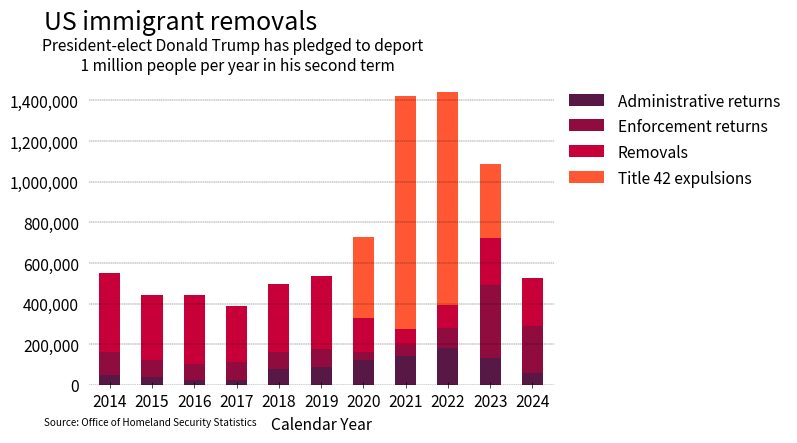

In [ ]:
## Draw chart ##
# Set colors
colors = [
    '#581845',  # deep purple
    '#900C3F',  # purple-red
    '#C70039',  # dark red
    '#FF5733'   # bright red-orange
]

# Plot data as stacked bar chart
data.plot(x='Calendar Year', kind='bar', stacked=True, color=colors)

# Make plot with AFP styling and titles
style.style_plot(plt,
           'US immigrant removals',
           '''President-elect Donald Trump has pledged to deport 
           1 million people per year in his second term''',
           'Office of Homeland Security Statistics')

# Move legend to right
ax = plt.subplot(111)
ax.legend(bbox_to_anchor=(1, 1))
plt.xticks(rotation=0, ha='center') 

# Change Y tick format to insert commas
yticks = ax.get_yticks()
ax.set_yticklabels(['{:,.0f}'.format(t) for t in yticks])
# Save
plt.savefig('iamge/deportations.svg')